## Weather Analysis
In general the expected results should show that cities closer to the equator have a higher relative temperature and humidity than those further away. The analysis of random cities selected seeks to prove or disprove hypothesis.

Results:

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
from pprint import pprint

# Google API Key
from config import gkey

# Import API key
from config import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
# If the city is unique, then add it to your cities list
    if city not in cities:
        cities.append(city)        
        
# Print the city count to confirm sufficient count
len(cities)

630

In [3]:
#Create a Dataframe with list of cities
cities_df = pd.DataFrame(cities)
cities_df["City Name"] = ""
cities_df["Country Code"] = ""

for index, row in cities_df.iterrows():
    row["City Name"] = cities_df.loc[index,0]
    
cities_df.set_index("City Name")
cities_df= cities_df.drop(0, axis=1)
cities_df.head()

,City Name,Country Code
0,koroni,
1,high level,
2,avarua,
3,busselton,
4,ushuaia,


In [4]:
#Additional columns to add to DataFrame
cities_df["lat"] = ""
cities_df["lng"] = ""
cities_df["Temperature (F)"] = ""
cities_df["Humidity (%)"] = ""
cities_df["Cloudiness"] = ""
cities_df["Windspeed (mph)"] = ""
# cities_df= cities_df.drop(0, axis=1)
cities_df.head()

,City Name,Country Code,lat,lng,Temperature (F),Humidity (%),Cloudiness,Windspeed (mph)
0,koroni,,,,,,,
1,high level,,,,,,,
2,avarua,,,,,,,
3,busselton,,,,,,,
4,ushuaia,,,,,,,


## Perform API Calls

In [ ]:
# create a params dict that will be updated with new city each iteration
params = {"key": gkey}

# Loop through the cities_pd and run a lat/long search for each city
for index, row in cities_df.iterrows():
    base_url = "https://maps.googleapis.com/maps/api/geocode/json"

    city = row['City Name']
    state = []

    # update address key value
    params['address'] = f"{city},{state}"

    # make request
    cities_lat_lng = requests.get(base_url, params=params)
    
    # print(cities_lat_lng.url)
    
    # convert to json
    cities_lat_lng = cities_lat_lng.json()

    cities_df.loc[index, "lat"] = cities_lat_lng["results"][0]["geometry"]["location"]["lat"]
    cities_df.loc[index, "lng"] = cities_lat_lng["results"][0]["geometry"]["location"]["lng"]

# Visualize to confirm lat lng appear
cities_df.head()

In [6]:
# params dictionary to update each iteration
params = {
    "radius": 50000,
    "types": "name",
    "keyword": "country",
    "key": gkey
}

# Use the lat/lng we recovered to identify airports
for index, row in cities_df.iterrows():
    # get lat, lng from df
    lat = row["lat"]
    lng = row["lng"]

    # change location each iteration while leaving original params in place
    params["location"] = f"{lat},{lng}"

    # Use the search term: "country" and our lat/lng
    base_url = "http://api.openweathermap.org/data/2.5/weather?q=&name&units=Imperial&APPID=" + api_key 
    query_url = url +"&name="+ str(row["City Name"])+"&lat="+ str(row["lat"]) + "&lon=" + str(row["lng"]) 

    # make request and print url
    response = requests.get(query_url, params=params)

    # convert to json
    response =  response.json()

    # Since some data may be missing we incorporate a try-except to skip any that are missing a data point.
    try:
        cities_df.loc[index, "Temperature (F)"] =  response["results"][0]["temp"]
        cities_df.loc[index, "Humidity (%)"] =  response["results"][0]["humidity"]
        cities_df.loc[index, "Cloudiness"] =  response["results"][0]["all"]
        cities_df.loc[index, "Windspeed (mph)"] =  response["results"][0]["speed"]
    except (KeyError, IndexError):
        print("Missing field/result... skipping.")



In [ ]:
# To dataframe
cities_df

In [5]:
# Output File (CSV)
cities_df.to_csv("Output_Data/weather_results.csv", index=False)

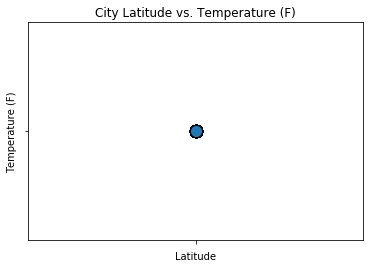

In [116]:
#Latitude vs. Temperature
#axes values
x_axis = cities_df['lat']
y_axis = cities_df['Temperature (F)']
plt.scatter(x_axis, y_axis, s=150, edgecolors='black')

#Chart labels
plt.title("City Latitude vs. Temperature (F)")
plt.xlabel("Latitude")
plt.ylabel("Temperature (F)")

plt.savefig("Output_Data/Latitude_Temperature (F).png")
plt.show()


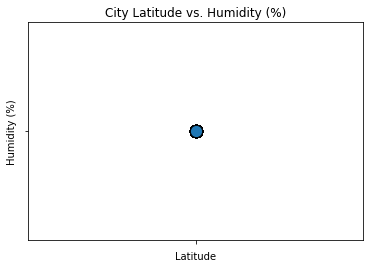

In [32]:
#Latitude vs. Humidity (%)
#axes values
x_axis = cities_df['lat']
y_axis = cities_df['Humidity']
plt.scatter(x_axis, y_axis, s=150, edgecolors='black')

#Chart labels
plt.title("City Latitude vs. Humidity (%)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

plt.savefig("Output_Data/Latitude_Humidity (%).png")
plt.show()


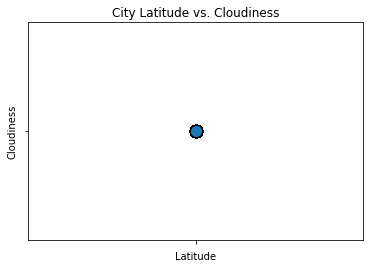

In [117]:
#Latitude vs. Cloudiness
#axes values
x_axis = cities_df['lat']
y_axis = cities_df['Cloudiness']
plt.scatter(x_axis, y_axis, s=150, edgecolors='black')

#Chart labels
plt.title("City Latitude vs. Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")

plt.savefig("Output_Data/Latitude_Cloudiness.png")
plt.show()


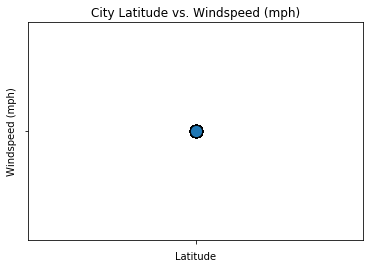

In [118]:
#Latitude vs. Windspeed (mph)
#axes values
x_axis = cities_df['lat']
y_axis = cities_df['Windspeed (mph)']
plt.scatter(x_axis, y_axis, s=150, edgecolors='black')

#Chart labels
plt.title("City Latitude vs. Windspeed (mph)")
plt.xlabel("Latitude")
plt.ylabel("Windspeed (mph)")

plt.savefig("Output_Data/Latitude_Winspeed.png")
plt.show()